### Distribución exponencial: La distribución exponencial viene dada por:

$f(x)=\lambda e^{-\lambda x}$

y podemos calcular su CDF como:

$F(x)=\int_0^x \lambda e^{-\lambda x'}dx' = 1 - e^{-\lambda x}$

cuya inversa resulta en:
    
$y = 1 - e^{-\lambda x} \quad\Longleftrightarrow\quad x = -\frac{\ln(1-y)}{\lambda}$

Si repetimos muchas veces el experimento, el resultado en un intervalo de longitud fija debe aproximar una distribución de Poisson, la cual viene dada por:

$p(k)=\frac{e^{-\lambda}\lambda^{k}}{k!}$


In [27]:
import numpy as np

def simulate_poisson_process(lam, T ):
    """
    Simula un proceso de Poisson homogéneo con tasa lam (eventos por unidad de tiempo)
    hasta el tiempo T, usando el método de la transformada inversa para los tiempos
    entre eventos (Exponencial(lam)).

    Devuelve:
      - event_times: array con los tiempos de ocurrencia en (0, T]
      - n_events: cantidad total de eventos en [0, T]
    """


    t = 0.0
    event_times = [] # Lista para almacenar los tiempos de eventos

    while True: # Bucle hasta que el tiempo exceda T
        # Genero U ~ Uniform(0,1)
        u = np.random.uniform() # Genero un número aleatorio U entre 0 y 1
        # Tiempo entre eventos: X = -ln(1-U)/lam
        x = -np.log(1.0 - u) / lam # son los saltos de tiempo entre eventos
        t = t + x # Actualizo el tiempo actual, se va sumando los saltos, tiempo acumulado
        if t > T:
            break
        event_times.append(t) #Almaceno en una lista los tiempos de eventos

    event_times = np.array(event_times) # Convierto la lista a un array de numpy
    return event_times, len(event_times) # Devuelvo los tiempos de eventos y la cantidad de eventos



if __name__ == "__main__": #sirve para que el código dentro de este bloque solo se ejecute si el archivo se ejecuta como un script, no si se importa como un módulo
    #un script es un archivo que contiene código que se puede ejecutar directamente, un modulo es un archivo que contiene definiciones y declaraciones de Python que se pueden reutilizar en otros archivos
    lam = 5.0   # eventos por hora
    T = 3.0     # horas

    times, k = simulate_poisson_process(lam, T)
    print(f"Tasa λ = {lam}/h, horizonte T = {T} h")
    print(f"Número de eventos simulados N(T) = {k} (esperado ≈ λ·T = {lam*T:.0f})")
    print("Tiempos de ocurrencia (h):")
    print(np.round(times, 4))

    # Validación empírica vs. teoría
    n_runs = 10000 # cantidad de simulaciones independientes
    counts = []     # lista para almacenar los conteos de eventos en cada simulación
    for i in range(n_runs): # simulo n_runs veces el proceso
        i, k = simulate_poisson_process(lam, T) #
        counts.append(k) # almaceno la cantidad de eventos en cada simulación en la lista counts (lista de 10000 elementos)

    counts = np.array(counts) # convierto la lista a un array de numpy
    mean_counts = counts.mean() # calculo la media empírica de los conteos

    print("\nValidación (empírico vs. teoría Poisson(λT)):")
    print(f"Media empírica    ≈ {mean_counts:.3f}    (teórica: {lam*T:.3f})")


Tasa λ = 5.0/h, horizonte T = 3.0 h
Número de eventos simulados N(T) = 15 (esperado ≈ λ·T = 15)
Tiempos de ocurrencia (h):
[0.0256 0.1672 0.1745 0.4807 0.8297 0.8396 0.9769 1.3968 2.073  2.3077
 2.5095 2.5553 2.7843 2.8759 2.8806]

Validación (empírico vs. teoría Poisson(λT)):
Media empírica    ≈ 15.050    (teórica: 15.000)


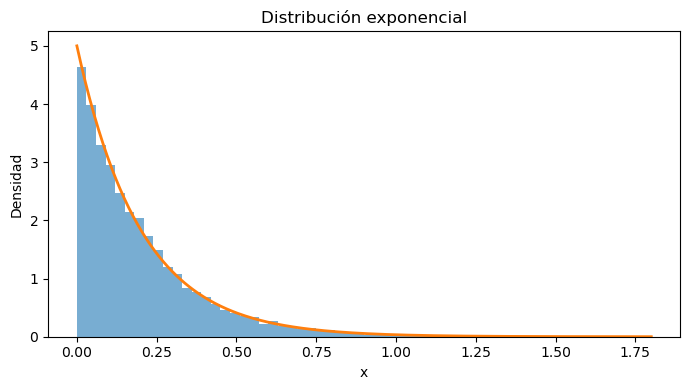

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
lam = 5.0         # tasa de eventos (eventos por unidad de tiempo)
n   = 10000   # cantidad de muestras para que el histo se vea suave

# Genero exponenciales por transformada inversa:
u = np.random.uniform(size=n)
x = -np.log(1.0 - u) / lam   # tiempos entre eventos ~ Exp(lam)

# Histograma (densidad) y PDF teórica superpuesta
plt.figure(figsize=(7,4))
plt.hist(x, bins=60, range=(0, 1.8), density=True, alpha=0.6, edgecolor='none')

xx = np.linspace(0, 1.8, 400)
pdf = lam * np.exp(-lam * xx)
plt.plot(xx, pdf, linewidth=2)

plt.title("Distribución exponencial")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.tight_layout()
plt.show()

# Estoy demostrando que los saltos de tiempo entre eventos siguen una distribución exponencial con parámetro lam.
# Es más probable que los saltos sean pequeños (eventos cercanos en el tiempo) y menos probable que sean grandes (eventos muy separados en el tiempo).